# Oscilador Acoplado

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Primer ejemplo


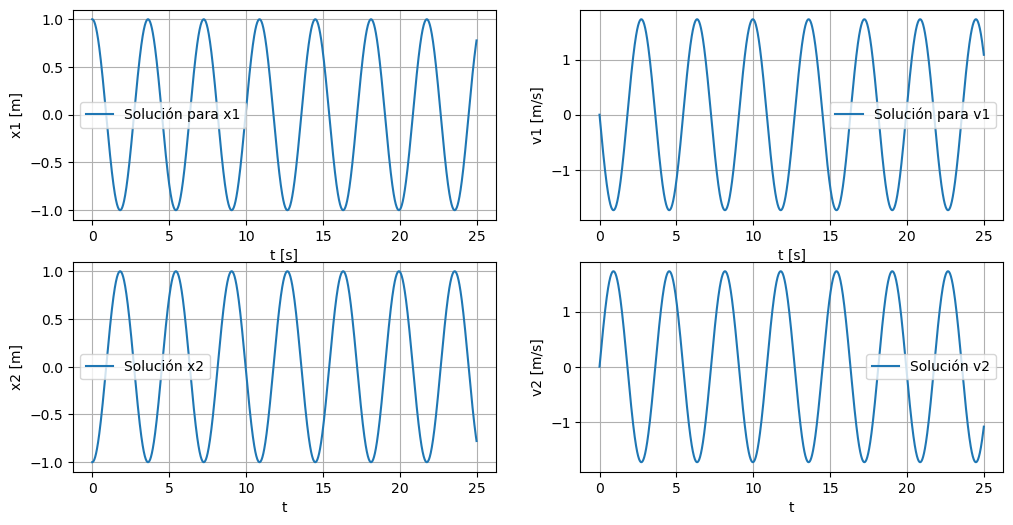

In [7]:
def rungekutta(h,dx1,dx2,dv1,dv2,t0,x10,v10,x20,v20,tf):
    N = int((tf - t0)/h)
    t_v = np.linspace(t0,tf,N+1)
    x1_v = np.zeros(N+1)
    x2_v = np.zeros(N+1)
    v1_v = np.zeros(N+1)
    v2_v = np.zeros(N+1)
    x1_v[0] = x10
    x2_v[0] = x20
    v1_v[0] = v10
    v2_v[0] = v20
    for i in range(N):
        k1 = h*dx1(t_v[i],x1_v[i],v1_v[i])
        k11 = h*dx2(t_v[i],x2_v[i],v2_v[i])
        l1 = h*dv1(t_v[i],x1_v[i],x2_v[i],v1_v[i])
        l11 = h*dv2(t_v[i],x1_v[i],x2_v[i],v2_v[i])
        k2 = h*dx1(t_v[i] + h/2, x1_v[i] + k1/2, v1_v[i] + l1/2)
        k22 = h*dx2(t_v[i] + h/2, x2_v[i] + k11/2, v2_v[i] + l11/2)
        l2 = h*dv1(t_v[i] + h/2, x1_v[i] + k1/2, x2_v[i] + k11/2, v1_v[i] + l1/2)
        l22 = h*dv2(t_v[i] + h/2, x1_v[i] + k1/2, x2_v[i] + k11/2, v2_v[i] + l11/2)
        x1_v[i+1] = x1_v[i] + k2
        v1_v[i+1] = v1_v[i] + l2
        x2_v[i+1] = x2_v[i] + k22
        v2_v[i+1] = v2_v[i] + l22
    
    plt.figure(figsize = (12,6))
    plt.subplot(2,2,1)
    plt.plot(t_v,x1_v, label = 'Solución para x1')
    plt.xlabel('t [s]')
    plt.ylabel('x1 [m]')
    plt.legend()
    plt.grid()
    
    plt.subplot(2,2,2)
    plt.plot(t_v,v1_v, label = 'Solución para v1')
    plt.xlabel('t [s]')
    plt.ylabel('v1 [m/s]')
    plt.legend()
    plt.grid()

    plt.subplot(2,2,3)
    plt.plot(t_v,x2_v, label = 'Solución x2')
    plt.xlabel('t')
    plt.ylabel('x2 [m]')
    plt.legend()
    plt.grid()

    plt.subplot(2,2,4)
    plt.plot(t_v,v2_v, label = 'Solución v2')
    plt.xlabel('t')
    plt.ylabel('v2 [m/s]')
    plt.legend()
    plt.grid()
    plt.show()
    return t_v, x1_v, x2_v, v1_v, v2_v

print('Primer ejemplo')
x10 = 1
v10 = 0
x20 = -1
v20 = 0
t0 = 0
tf = 25
h = 0.01
m1 =1
k1 = 2
m2 = 1
k2 = 2
kc = 0.5
dx1 = lambda t, x1, v1: v1
dv1 = lambda t, x1, x2, v1: -(k1/m1)*x1 + (kc/m1)*(x2-x1)
dx2 = lambda t, x2, v2: v2
dv2 = lambda t, x1, x2, v2: -(k2/m2)*x2 - (kc/m2)*(x2-x1)

b =  rungekutta(h,dx1,dx2,dv1,dv2,t0,x10,v10,x20,v20,tf)
